In [1]:
# Set path variables
import os
import sys

cwd = os.getcwd()
project_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(project_dir)

data_path = os.path.join(project_dir, 'data/')
print(project_dir)
print(data_path)

/Users/ab/Projects/Tagging-Music-Sequences
/Users/ab/Projects/Tagging-Music-Sequences/data/


In [2]:
from IPython.display import Audio
from src.data_loader import *
from src.audio_util import *
import pandas as pd
from tqdm import tqdm
import torchaudio

In [3]:
# Set a seed for reproducibility
random.seed(1)

In [4]:
# Load label annotation csv
train_annotations = pd.read_csv(data_path + 'mtat_train_label.csv', index_col=0).reset_index(drop=True)

In [5]:
train_annotations.head()

,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,soft,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath
0,False,0,0,0,0,True,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/0/paul_berget-the_siena_manuscript_on_ste...
1,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/e/briddes_roune-lenten_is_come-04-the_mil...
2,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/1/suzanne_teng-mystic_journey-08-clouds_a...
3,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/7/solace-shawaza-08-serpentine-436-465.mp3
4,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/7/rob_costlow-woods_of_chaos-10-twilight-...


### Original Audio

In [6]:
filepath = data_path + train_annotations['filepath'][0]
audio = AudioUtil.open(filepath)
waveform, sample_rate = audio

In [7]:
print(filepath)

/Users/ab/Projects/Tagging-Music-Sequences/data/mtat/0/paul_berget-the_siena_manuscript_on_steel_string_guitar-06-recercar_6_steel_string_guitar-30-59.mp3


### Time Stretching

https://iopscience.iop.org/article/10.1088/1742-6596/1453/1/012085/meta
-> suggests `stretch_factor` $\in [0.8, 1.25]$

In [8]:
stretch_factor = random.uniform(0.8, 1.25)

In [9]:
waveform_stretched, sample_rate = AudioAugment.time_stretch(audio, stretch_factor=stretch_factor)

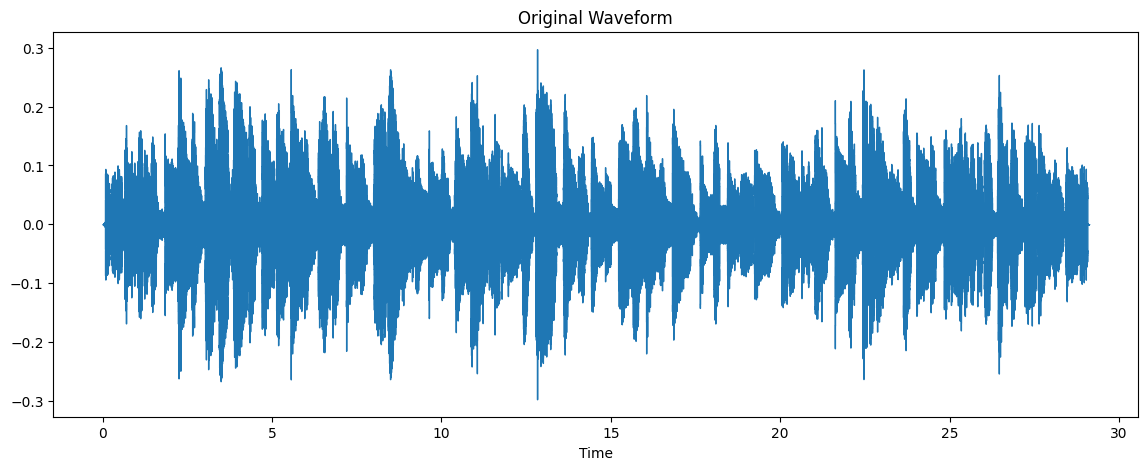

In [10]:
AudioPlot.plot_waveform(waveform, sample_rate, title='Original Waveform')

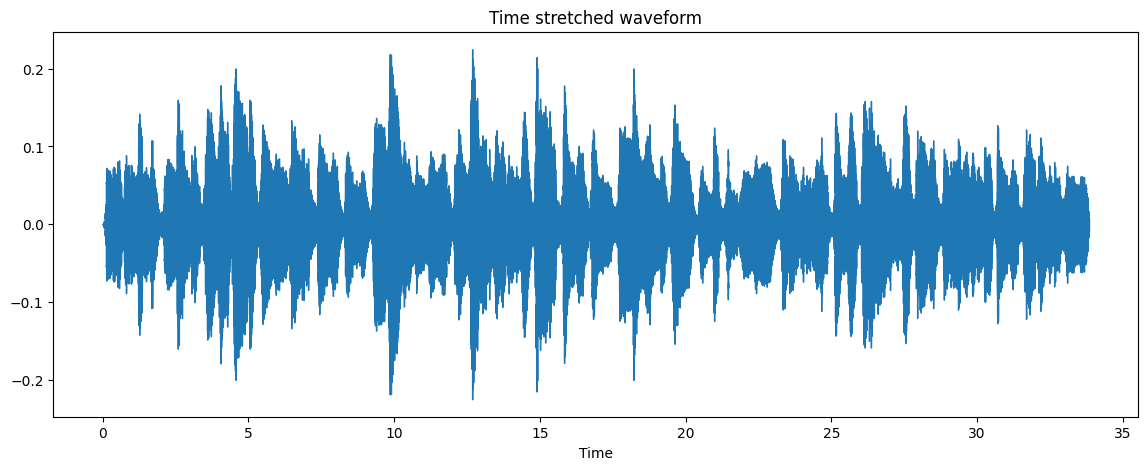

In [11]:
AudioPlot.plot_waveform(waveform_stretched, sample_rate, title='Time stretched waveform')

In [12]:
# Original audio
Audio(filepath)

In [13]:
# Stretched audio
Audio(waveform_stretched, rate=sample_rate)

### Pitch shifting

https://iopscience.iop.org/article/10.1088/1742-6596/1453/1/012085/meta
-> suggests n_steps set of [-4, 4]

In [14]:
waveform_pitch_shifted, sample_rate = AudioAugment.pitch_shift(audio, n_steps=10)

In [15]:
# Original audio
Audio(filepath)

In [16]:
# Pitch shifted audio
Audio(waveform_pitch_shifted.detach().numpy(), rate=sample_rate)

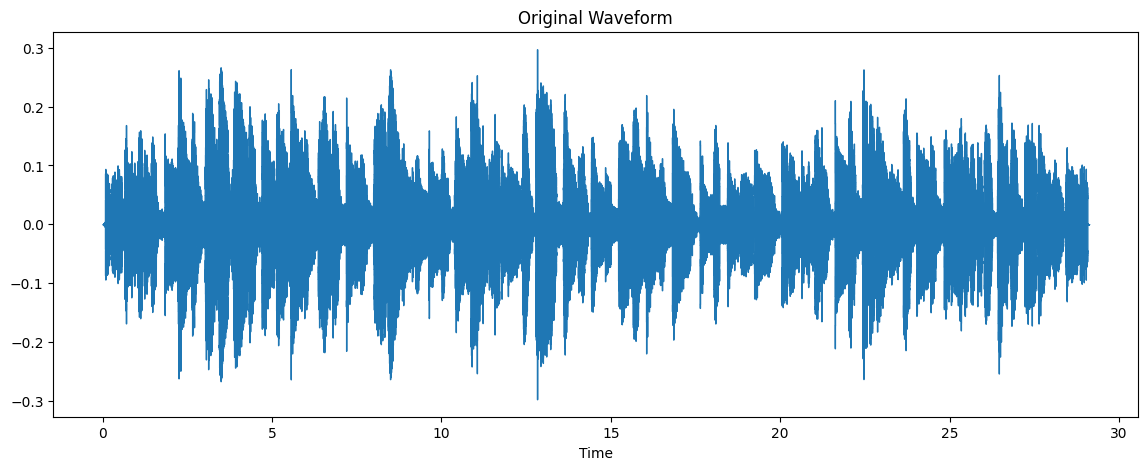

In [17]:
AudioPlot.plot_waveform(waveform, sample_rate, title='Original Waveform')

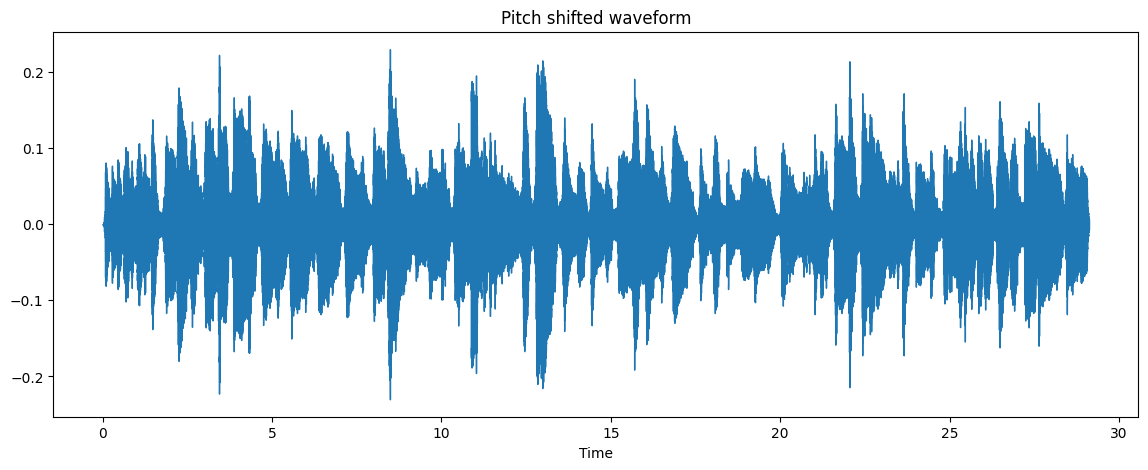

In [18]:
AudioPlot.plot_waveform(waveform_pitch_shifted, sample_rate, title='Pitch shifted waveform')

## Generate new samples

Main driver code to perform augmentation across whole training data

In [19]:
train_original = pd.read_csv(data_path + 'mtat_train_label.csv', index_col=0).reset_index(drop=True)

In [20]:
train_original.shape
# expected to be 12983 + (12983 * n) after transformation

(12983, 135)

In [21]:
# setup parameters
output_dir = 'mtat/augmented'
augmentations = [
    {'name': 'pitch_shift', 'params': {'n_steps': random.randint(-4, 4)}},
    {'name': 'time_stretch', 'params': {'stretch_factor': random.uniform(0.8, 1.25)}},
]

In [22]:
# perform augmentations and store audio files
for filepath in tqdm(train_original['filepath'].unique()):
    df_aug = AudioAugment.augment_and_store_audio(train_original, n=3, output_dir=output_dir, augmentations=augmentations, dry_run=False)

KeyboardInterrupt: 

In [ ]:
df_aug

Manually inspect results for one sample

In [ ]:
# Original version
print(df_aug['filepath'][0])
Audio('../data/' + df_aug['filepath'][0])

In [ ]:
waveform, sample_rate = AudioUtil.open('../data/' + df_aug['filepath'][0])
AudioPlot.plot_waveform(waveform, sample_rate)

In [ ]:
# Augmented version 1
print(df_aug['filepath'][2])
Audio('../data/' + df_aug['filepath'][2])

In [ ]:
# Augmented version 1
print(df_aug['filepath'][2])
Audio('../data/' + df_aug['filepath'][2])

In [ ]:
# Augmented version 2
print(df_aug['filepath'][3])
Audio('../data/' + df_aug['filepath'][3])

In [ ]:
# Augmented version 3
print(df_aug['filepath'][4])
Audio('../data/' + df_aug['filepath'][4])

In [ ]:
# Augmented version 4
print(df_aug['filepath'][5])
Audio('../data/' + df_aug['filepath'][5])

In [ ]:
# Augmented version 5
print(df_aug['filepath'][6])
Audio('../data/' + df_aug['filepath'][6])

In [ ]:
waveform, sample_rate = AudioUtil.open('../data/' + df_aug['filepath'][6])
AudioPlot.plot_waveform(waveform, sample_rate)